Importujemy potrzebne biblioteki

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import scipy.stats as st
from matplotlib.font_manager import FontProperties
font = FontProperties('Arial')


Funkcje pomocnicze, które tworzyliśmy w poprzednich skryptach:

In [2]:
def sin(f = 1, T = 1, Fs = 128, phi =0 ):
    '''sin o zadanej częstości (w Hz), długości, fazie i częstości próbkowania
    Domyślnie wytwarzany jest sygnał reprezentujący 
    1 sekundę sinusa o częstości 1Hz i zerowej fazie próbkowanego 128 Hz
    '''
 
    dt = 1.0/Fs
    t = np.arange(0,T,dt)
    s = np.sin(2*np.pi*f*t + phi)
    return (s,t)

def widmo_dB(s, N_fft , F_samp):
    S = fft.rfft(s,N_fft)/np.sqrt(N_fft)
    S_dB = 20*np.log10(np.abs(S))
    F = fft.rfftfreq(N_fft, 1/F_samp)
    return S_dB,F

# Widmo mocy
<!--
=== Moc===
Moc chwilowa sygnału przez analogię do układów elektrycznych o jednostkowym oporze jest w analizie sygnałów przyjęta jako kwadraty próbek ($P = I^2 R = \frac{U^2}{R}$).
Oznaczmy sygnał 
$x[n]$, wówczas jego moc wyraża się wzorem:
:$P[n]=x[n]^2$, 
a energia wzorem:
:$E = \sum _n{x[n]^2}$

===Widmo mocy: tw. Plancherela i tw. Parsevala ===
Twierdzenia te omawiane i dowodzone były na [[Szereg_Fouriera#To.C5.BCsamo.C5.9B.C4.87_Parsevala_dla_szereg.C3.B3w_Fouriera|wykładzie]]. Tutaj, tylko krótko przypomnijmy sobie: 
====Twierdzenie Plancherela====
Jeśli $X[k]$ i $Y[k]$ są transformatami $x[n]$ i $y[n]$ odpowiednio to:
<equation id="uid15">
$
\sum _{n=0}^{N-1} x[n]y^*[n] = \frac{1}{N} \sum _{k=0}^{N-1} X[k] Y^*[k]
$
</equation>
gwiazdka oznacza sorzężenie zespolone. 
====Twierdzenie Parsevala====
jest specjalnym przypadkiem twierdzenia Plancherela:
<equation id="uid16">
$
\sum _{n=0}^{N-1} \left|x[n]\right|^2 = \frac{1}{N} \sum _{k=0}^{N-1} \left|X[k]\right|^2.
$
</equation>
Twierdzenie to upoważnia nas do utożsamiania kwadratów wartości bezwzględnej składowych transformaty Fouriera z mocą niesioną przez odpowiadające im składowe.

Na wykładzie udowodnione było twierdzenie Parsewala dla sygnałów ciągłych. Dowód tego tweirdzenia w przypadku dyskretnym można przeprowadzić następującym rachunkiem:

Załóżmy, że  X jest szeregiem Fouriera x, a x jest sygnałem o długości N:
:$X[r]=\sum_{k=0}^{N - 1}x[k]e^{i2 \pi kr/N} $

Wtedy:
:$|X[r]|^2 = \sum_{k=0}^{N - 1}  x[k]e^{i2 \pi kr/N} \sum_{k'=0}^{N - 1} x^*[k']e^{-i2 \pi k'r/N} $
:::$ = \sum_{k=0}^{N - 1}  x[k]\sum_{k'=0}^{N - 1} x^*[k']e^{i2 \pi (k-k')r/N} $

Zsumujmy to wyrażenie stronami:
:$\sum_{r=0}^{N-1} |X[r]|^2 = \sum_{r=0}^{N - 1} \sum_{k=0}^{N - 1}  x[k]\sum_{k'=0}^{N - 1} x^*[k']e^{i2 \pi (k-k')r/N} $ 

Zmieńmy kolejność sumowania:
:$\sum_{r=0}^{N-1} |X[r]|^2 = \sum_{k=0}^{N - 1}  x[k]\sum_{k'=0}^{N - 1} x^*[k']\sum_{r=0}^{N - 1} e^{i2 \pi (k-k')r/N} $ 

Zauważmy, że:
:$\sum_{r=0}^{N - 1} e^{i2 \pi (k-k')r/N} = N \delta_{k,k'}$
bo dla k=k' sumujemy  jedynki, dla $k \ne k' $sumujemy N symetrycznie rozłożonych pierwiastków N-tego stopnia z $ e^{i2 \pi (k-k')$

Zatem:
:$\sum_{r=0}^{N - 1} |X[r]|^2 = N \sum_{k=0}^{N - 1} |x[k]|^2$
czyli
:$\sum_{k=0}^{N - 1} |x[k]|^2  = \frac{1}{N} \sum_{r=0}^{N - 1} |X[r]|^2$
-->

## Obliczanie mocy sygnału 
### Zadanie: Moc i energia sygnału w dziedzinie czasu
Proszę:
* wygenerować sygnał sinusoidalny $s$ o amplitudzie 1, częstości 10 Hz, trwający 0.3 sekundy i próbkowany z częstością 1000 Hz.
* narysować ten sygnał przy pomocy funkcji <tt>pylab.stem</tt>, 
* obliczyć i narysować przebieg mocy w czasie $P_t = s_t^2$: '''moc w danej chwili to kwadrat wartości próbki sygnału'''
* obliczyć energię tego sygnału $E = \sum_t P_t \Delta t $: '''energia to suma mocy mnożonej przez przyrosty czasu między próbkami'''

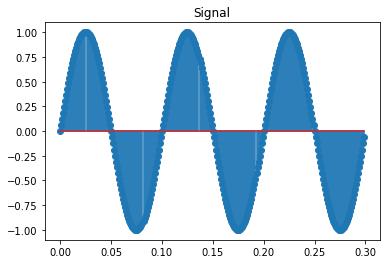

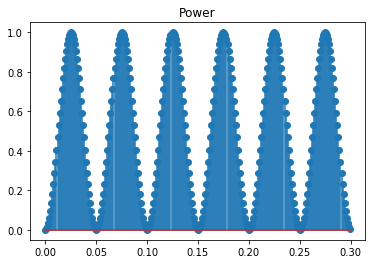

Energy:  0.15


In [3]:
f = 10
T = 0.3
Fs = 1000
(s, t) = sin(f, T, Fs)

plt.stem(t, s)
plt.title('Signal')
plt.show()

s_p = s**2
plt.stem(t, s_p)
plt.title('Power')
plt.show()

# Energy
E = np.sum(s_p/Fs)
print("Energy: ", E)

## Moc i energia sygnału w dziedzinie częstości;
### Periodogram: widmo mocy okienkowanego sygnału
Aby policzyć widmo mocy sygnału z zastosowaniem okienek wprowadzimy następujące symbole:
* sygnał: $s[n]$
* okienko: $ w[n]$
* okienko znormalizowane: $\hat w[n] = \frac{1}{\sqrt{\sum_{n=0}^{N-1} (w[n])^2}}w[n]$ 
<!--(w szczególnym przypadku okienka prostokątnego normalizacja ta daje $1/N^2$ występujące we wzorze na moc)-->
* widmo mocy sygnału okienkowanego, czyli periodogram:
$
P[k] = \frac{1}{\sum_{n=0}^{N-1} (w[n])^2}  \left|\sum_{n=0}^{N-1} s[n]w[n] e^{i\frac{2 \pi }{N} k n}\right|^2 
$

### Zadanie: Obliczanie periodogramu
* Proszę napisać funkcję obliczającą periodogram.
 * Funkcja jako argumenty powinna przyjmować sygnał, okno (podane jako sekwencja próbek), i częstość próbkowania. 
 * Zwracać powinna widmo mocy i skalę osi częstości. Wewnątrz funkcja powinna implementować liczenie widma z sygnału okienkowanego znormalizowanym oknem.
* Funkcję proszę przetestować obliczając dla funkcji sinus energię sygnału w dziedzinie czasu i w dziedzinie częstości. Testy proszę wykonać dla okna prostokątnego, Blackmana i Haminga.

energia sygnału: 0.993481410228
energia periodogramu: 2525.0


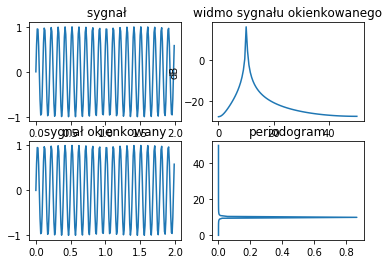

In [90]:
def periodogram(s, okno , F_samp):
    '''peiodogram sygnału s
    okno - synał będzie przez nie przemnożony w czasie
    F_samp- częstość próbkowania'''
    okno= okno/np.linalg.norm(okno) 
    s = s*okno
    S = fft.rfft(s)
    P =  abs(S)**2# Oblicz moc jako iloczyn unormowanej transformaty i jej sprzężenia zespolonego. 
    P = P/F_samp# Unormuj widmo dzieląc przez częstość próbkowania
    P = np.real(P)# Do dalszych operacji wybierz tylko część rzeczywistą mocy.
    if len(s)%2 ==0: # dokładamy moc z ujemnej części widma 
        P[1:-1] *=2
    else:
        P[1:] *=2
    F = fft.rfftfreq(len(s), 1/F_samp)# Korzystając z funkcji <tt>rfftfreq</tt> obliczamy częstości, dla których policzone są współczynniki Fouriera.
    return F,P

F_samp = 100.0
(x,t) = sin(f = 10.1, T =2, Fs = F_samp, phi = 0)
N = len(x) # długość sygnału
okno = np.ones(N)#/np.sqrt(N)
#okno = np.blackman(N)
#okno = np.hamming(N)

s = x*okno # sygnał okienkowany
#
plt.subplot(2,2,1)
plt.plot(t,x)
energia_t = np.sum(x**2)/Fs
print ('energia sygnału:', energia_t)
plt.title(u' sygnał')

# 
plt.subplot(2,2,2)
(S,F) = widmo_dB(s,N,F_samp) 
plt.plot(F,S)
plt.title(u'widmo sygnału okienkowanego')
plt.ylabel('dB')
#
plt.subplot(2,2,3)
plt.plot(t,s)
plt.title(u' sygnał')
plt.title(u' sygnał okienkowany ')

#periodogram
plt.subplot(2,2,4)
(P, F) = periodogram(x,okno,F_samp)
plt.plot(F,P)
        
plt.title('periodogram')
print ('energia periodogramu:', np.sum(P))
plt.show()

# Sygnały stochastyczne
Sygnał stochastyczny to taki sygnał, dla którego ciągu próbek nie da się opisać funkcją czasu. Kolejne próbki w takim sygnale to [zmienne losowe](https://brain.fuw.edu.pl/edu/index.php/WnioskowanieStatystyczne/Zmienne_losowe_i_generatory_liczb_pseudolosowych#Zmienna_losowa) . Można je opisać podając własności [rozkładu](https://brain.fuw.edu.pl/edu/index.php/WnioskowanieStatystyczne/Zmienne_losowe_i_generatory_liczb_pseudolosowych#Rozk.C5.82ad_prawdopodobie.C5.84stwa), z którego pochodzą. Często w opisie takich zmiennych posługujemy się [momentami rozkładów](https://brain.fuw.edu.pl/edu/index.php/WnioskowanieStatystyczne/Zmienne_losowe_i_generatory_liczb_pseudolosowych#Momenty).
Jak można sobie wyobrazić rozkłady, z których pochodzą próbki?

Można sobie wyobrazić, że obserwowany przez nas sygnał stochastyczny to jedna z możliwych realizacji procesu stochastycznego. 

Jeśli $K$jest zbiorem $k$ zdarzeń ($k \in K$) i każde z tych zdarzeń ma przypisaną funkcję $x_k(t)$ zwaną realizacją procesu $\xi (t)$, to proces stochastyczny może być zdefiniowany jako zbiór funkcji:
$
\xi (t) = \left\lbrace x_1(t),x_2(t),\dots , x_N(t) \right\rbrace 
$
gdzie $x_k(t)$ są losowymi funkcjami czasu $t$.


Procesy stochastyczne można opisywać przez wartości oczekiwane liczone po realizacjach.

Dla przypomnienia wartość oczekiwaną liczymy tak:
$
{\mu _x(t_1) = E\left[\xi (t_1) \right]= \lim _{N \rightarrow \infty }\sum _{k=1}^{N}{x_k(t_1)} p(x_k,t_1)}
$
średnia $\mu _x(t_1)$ procesu $\xi (t)$ w chwili $t_1$ to suma wartości zaobserwowanych w chwili we wszystkich realizacjach $t_1$ ważona prawdopodobieństwem wystąpienia tej realizacji.

Poniżej mamy przykład wytwarzania  procesu złożonego z dwóch realizacji po 50 próbek oraz estymowania jego wartości średniej. Każda próbka jest niezależną zmienną losową z rozkładu normalnego o średniej 0 i wariancji 1:

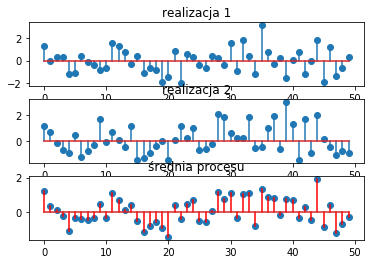

In [5]:
t = np.arange(0,50,1)

# realizacja 1
x1 = np.random.randn(t.size)

# realizacja 2
x2 = np.random.randn(t.size)

# średnia procesu
xm = 0.5*(x1+x2)

# ilustracja
plt.subplot(3,1,1)
plt.stem(t,x1)
plt.title('realizacja 1')
plt.subplot(3,1,2)
plt.stem(t,x2)
plt.title('realizacja 2')
plt.subplot(3,1,3)
plt.stem(t,xm,'r')
plt.title('średnia procesu')
plt.show()

## Stacjonarność i ergodyczność
<dl>
	<dt>
	Stacjonarność:
	<dd>
	Jeśli dla procesu stochastycznego $\xi (t)$ wszystkie momenty są niezależne od czasu to jest on stajonarny w ścisłym sensie. Jeśli tylko średnia $\mu _x$ i autokorelacja $R_x(\tau )$ nie zależą od czasu to proces jest stacjonarny w słabym sensie, co dla wielu zastosowań jest wystarczające.
	<dt>
	Ergodyczność:
	<dd>
	Proces jest ergodyczny jeśli jego średnie po czasie i po realizacjach są sobie równe. Oznacza to, że dla takiego procesu jedna realizacja jest reprezentatywna i zawiera całą informację o tym procesie.
</dl>

Założenie o sygnale, że jest stacjonarny i ergodyczny pozwala zamienić sumowanie po realizacjach na sumowanie po czasie w estymatorach momentów statystycznych.

### Zadanie: Estymacja widma sygnału stochastycznego
Bardzo często musimy oszacować widmo mocy sygnału zawierającego znaczny udział szumu. Przygotujmy sobie funkcję wutwarzającą _biały szum_, czyli sygnał złożony z próbek pochodzących z rozkładu Gaussa o średniej zero i zadanej wariancji:

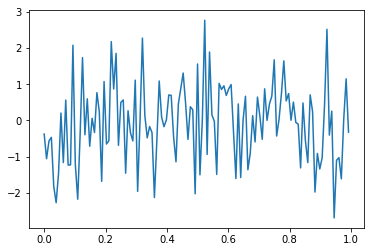

In [6]:
import scipy.stats as st
def szum(mu =0 , sigma = 1, T = 1, Fs = 128):
    '''szum gaussowski o zadanej:
        średniej mu
        wariancji sigma**2
        długości T,
        częstości próbkowania Fs
       '''
    dt = 1.0/Fs
    t = np.arange(0,T,dt)
    s = st.norm.rvs(loc=mu, scale=sigma, size=len(t))
    return (s,t)

# testujemy
(s,t) = szum()
plt.plot(t,s)
plt.show()

Poniższe ćwiczenie ilustruje niepewność szacowania pików w widmie otrzymanym z transformaty Fouriera dla sygnału zawierającego szum (stochastycznego).

* wygeneruj $N = 20$ realizacji sygnału będącego sumą sinusoidy (f = 20 Hz, T = 1 s, Fs = 100 Hz) i  szumu gaussowskiego. Zapamiętaj wszystkie realizacje w jednej tablicy:

In [11]:
N = 20 # liczba realizacji
T = 1 # 1 s
Fs = 100 # Hz
f = 20 # Hz
realizacje = np.zeros((N, T*Fs)) # tablica na realizacje
for i in range(N):
        (s,t) = sin(f, T, Fs) #realizacja sinusa
        (sz,t) = szum(mu = 0 , sigma = 1, T = T, Fs = Fs) #realizacja szumu
        syg = s + sz# sygnał będący sumą powyższych
        realizacje[i,:] = syg # wkładamy go do tablicy

* dla każdej realizacji oblicz periodogram z oknem prostokątnym i zapamiętaj go w tablicy widm:

In [12]:
widma = []
okno = np.ones(T*Fs)
for i in range(N):
    s = realizacje[i,:]
    F,P = periodogram(s,okno,Fs)
    widma.append([P, F])

* wykreśl wszystkie otrzymane widma na wspólnym wykresie

0.0 %
5.0 %
10.0 %
15.0 %
20.0 %
25.0 %
30.0 %
35.0 %
40.0 %
45.0 %
50.0 %
55.00000000000001 %
60.0 %
65.0 %
70.0 %
75.0 %
80.0 %
85.0 %
90.0 %
95.0 %


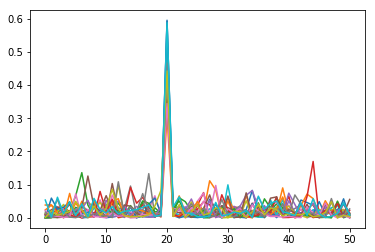

In [15]:
for count, widmo in enumerate(widma):
    print(count/len(widma)*100,'%')
    plt.plot(widmo[1], widmo[0]) # Wykorzystno plot, bo ładniej wygląda wykres
plt.show()

Proszę obejrzeć otrzymane widma.
* Zaobserwuj jakiego rzędu jest niepewność wyniku.
* Czy podobny problem występuje dla sygnału bez szumu?
* Skonstruuj funkcję rysującą średnie widmo wraz z [przedziałem ufności](https://brain.fuw.edu.pl/edu/index.php/WnioskowanieStatystyczne/_Przedzia%C5%82y_ufno%C5%9Bci).

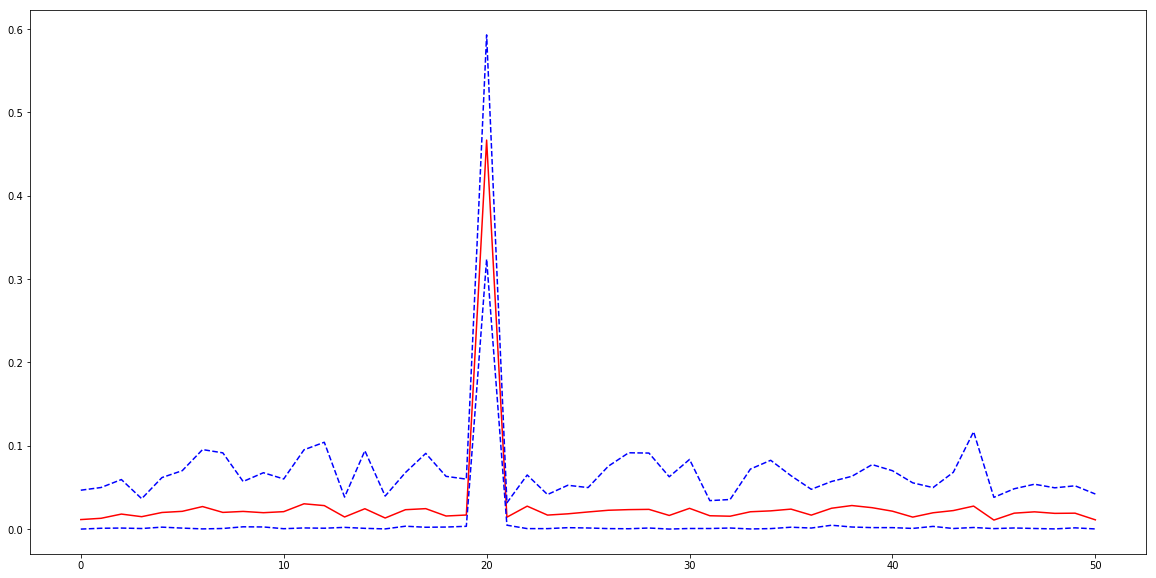

In [68]:
def srednie_widmo(realizacje, Fs):
    '''
    #  Skonstruuj funkcję rysującą średnie widmo wraz z 95% przedziałem ufności. 
    '''
    # dla każdej realizacji oblicz periodogram z oknem prostokątnym i zapamiętaj go w tablicy widm:
    widma = []
    okno = np.ones(T*Fs)
    for i in range(len(realizacje)):
        s = realizacje[i,:]
        F,P = periodogram(s,okno,Fs)
        widma.append(P)
    widma = np.array(widma)

    srednie_w = np.mean(widma, axis=0)# usrednij widma po realizacjach w każdej z częstości osobno
    przedzial_d = np.zeros(len(F)) # tablice na dolną i górną granicę przedziału ufności 
    przedzial_g = np.zeros(len(F))
    for f in F: # dla każdej częstości znajdujemy granice przedziałów ufności
        przedzial_d[int(f)] = st.scoreatpercentile(widma[:, int(f)], 2.5)
        przedzial_g[int(f)] = st.scoreatpercentile(widma[:, int(f)], 97.5)
    return F,  srednie_w, przedzial_d, przedzial_g

F,  srednie_w, przedzial_d, przedzial_g = srednie_widmo(realizacje, Fs)
plt.figure(figsize=(20,10))
plt.plot(F,srednie_w,'r') # rysujemy średnią
plt.plot(F,przedzial_d,'b--')# rysujemy granicę dolną
plt.plot(F,przedzial_g,'b--')# rysujemy granicę górną
plt.show()

## Oszacowanie błędu transformaty Fouriera dla białego szumu
* Niech  $x(t)$ - sygnał stochastyczny, którego kolejne próbki pochodzą z niezależnych rozkładów normalnych (biały szum),
* Jego transformata Fouriera $X(f)$ jest liczbą zespoloną
* Wówczas, część rzeczywista $X_R(f)$ i urojona $X_I(f)$ są nieskorelowanymi zmiennymi losowymi o średniej zero i równych wariancjach. 
* Ponieważ transformata Fouriera jest operacją liniową więc składowe  $X_R(f)$ i $X_I(f)$ mają rozkłady normalne. 
* Wielkość:
$\qquad$ $ P(f) = |X(f)|^2 = X_R^2(f) + X_I^2(f) $
$\qquad$ jest sumą kwadratów dwóch niezależnych zmiennych normalnych. 
* Wielkość ta podlega rozkładowi $\chi^2$ o dwóch stopniach swobody.

* Możemy oszacować względny błąd $P(f_1) $ dla danej częstości $f_1$: $\epsilon_r= \sigma_{P_{f_1}}/\mu_{P_{f_1}}$
  * Dla rozkładu $\chi_2^2$:  $\sigma^2 = 2n$ i $\mu = n$, gdzie $n$ jest ilością stopni swobody. 
  * W naszym przypadku $n =2$ więc mamy $\epsilon_f = 1$, 
  * Oznacza to, że dla pojedynczego binu częstości w widmie $P(f)$ względny błąd wynosi 100%. 

* Aby zmniejszyć ten błąd trzeba zwiększyć ilość stopni swobody. Są generalnie stosowane dwie techniki:   
  * Pierwsza: to uśrednianie sąsiednich binów częstości. Otrzymujemy wówczas wygładzony estymator mocy $\hat{P}_k$:
$\qquad$$\hat{P}_k = \frac{1}{l}[P_k + P_{k+1} + \dots + P_{k+l-1}]$
$\qquad$ Zakładając, że biny częstości  $P_i$ są niezależne estymator $P_k$ ma rozkład $\chi^2$ o ilości stopni swobody równej $n= 2l$. Względny błąd takiego estymatora to: $\epsilon_r= \sqrt{\frac{1}{l}}$. 

  * Druga: to podzielenie sygnału na fragmenty, obliczenie periodogramu dla każdego fragmentu, a następnie zsumowanie otrzymanych wartości:
$\qquad$$\hat{P}_k=[P_{k,1}+P_{k,2}+\dots+P_{k,j}+\dots+P_{k,q}]$
$\qquad$gdzie $S_{k,j}$ jest estymatą składowej o częstości $k$ w oparciu o $j-ty$ fragment sygnału. Ilość stopni swobody wynosi w tym przypadku $q$ zatem względny błąd wynosi: $\epsilon_r = \sqrt{\frac{1}{q}}$.

**Zauważmy, że w obu metodach zmniejszamy wariancję estymatora kosztem rozdzielczości w częstości.**

### Zadanie: Metoda Welcha

Proszę zapoznać się zaimplementowaną w bibliotece scipy.signal funkcją [https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.welch.html welch].  Proszę zwrócić uwagę na możliwe skalowania widma! Funkcję proszę przetestować obliczając dla funkcji sinus energię sygnału w dziedzinie czasu i w dziedzinie częstości. Testy proszę wykonać dla okna prostokątnego, Blackmana i Hamminga. 

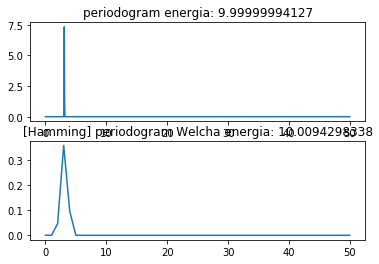

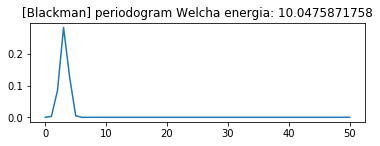

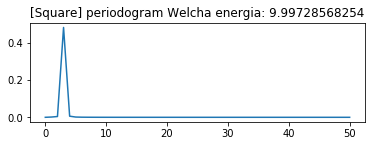

In [80]:
from scipy.signal import welch

Fs = 100.0
(x,t) = sin(f = 3.1, T =20, Fs = Fs, phi = 0)
N = len(x) # długość sygnału

#periodogram
okno = np.hamming(N)
okno/=np.linalg.norm(okno)
(F,P) = periodogram(x,okno,Fs)

plt.subplot(2,1,1)
plt.plot(F,P) 
plt.title('periodogram'+' energia: '+ str(np.sum(P)))

# Welch
plt.subplot(2,1,2)
Nseg =20
okno = np.hamming(N/Nseg) # tu potrzebujemy odpowiednio krótsze okno
okno/=np.linalg.norm(okno)
(F, P) = welch(x, Fs, okno)
plt.plot(F,P)
plt.title('[Hamming] periodogram Welcha'+' energia: '+ str(Nseg*np.sum(P)))
plt.show()

plt.subplot(2,1,2)
Nseg =20
okno = np.blackman(N/Nseg) # tu potrzebujemy odpowiednio krótsze okno
okno/=np.linalg.norm(okno)
(F, P) = welch(x, Fs, okno)
plt.plot(F,P)
plt.title('[Blackman] periodogram Welcha'+' energia: '+ str(Nseg*np.sum(P)))
plt.show()

plt.subplot(2,1,2)
Nseg =20
okno = np.ones(int(N/Nseg)) # tu potrzebujemy odpowiednio krótsze okno
okno/=np.linalg.norm(okno)
(F, P) = welch(x, Fs, okno)
plt.plot(F,P)
plt.title('[Square] periodogram Welcha'+' energia: '+ str(Nseg*np.sum(P)))
plt.show()


### Zadanie 6: Porównanie rozdzielczości i wariancji w periodogramie i w estymatorze Welcha
* wygeneruj 100 realizacji sygnału będącego sumą sinusoidy (f = 20 Hz, T = 10 s, Fs = 100 Hz) i szumu gaussowskiego
* dla każdej realizacji oblicz widmo mocy za pomocą periodogramu okienkowanego oknem Blackmana
* wykreśl wszystkie otrzymane widma na wspólnym wykresie (subplot(2,1,1))
* Powtórz krok 2) dla estymatora Welcha z oknem Blackmana o długości 1/10 długości sygnału przesuwanym co 2 punkty, otrzymane widma wykreśl  na wspólnym wykresie (subplot(2,1,2))

* Co można powiedzieć o rozdzielczości i względnym błędzie obu metod?
<tt>bl_wzg = np.std(S,axis = 0)/np.mean(S,axis = 0)</tt> gdzie S jest tablicą zawierającą widma dla każdej z realizacji.

(100, 51)
(51,)


/home/pawel/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


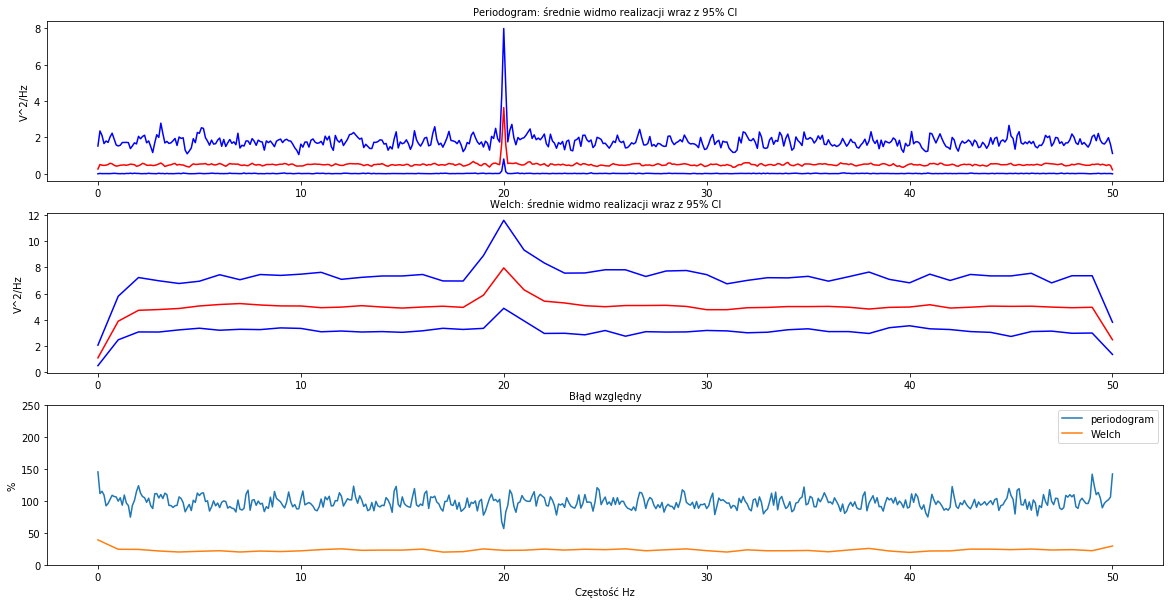

In [131]:
def realizacja(T,Fs):
    dt = 1./Fs
    t = np.arange(0,T,dt)
    # jedna realizacja sygnału będącego sumą sinusoidy (f = 20 Hz, T = 10 s, Fs = 100 Hz)
    # i szumu gaussowskiego o std 5-krotnie większym niż amplituda sinusoidy
    s = np.sin(2*np.pi*f*t) + st.norm.rvs(loc=0, scale=5, size=len(t))
    return s

T=10.0
Fs = 100.0
N = T*Fs

okno = np.blackman(N) # okno blakmana dla periodogramu
ile_okien = 10
Nw = N/ile_okien
okno_w = np.blackman(Nw)#okno blackmana dla welcha
okno_w/=np.linalg.norm(okno)

N_rep = 100
S_perio = np.zeros((N_rep,int(N//2+1))) # uwaga, to jest dobrze tylko dla Fs parzystych
S_welch = np.zeros((N_rep,int(Nw//2+1))) # uwaga, to jest dobrze tylko dla Fs parzystych
for i in range(N_rep):
    s = realizacja(T,Fs)
    (F_p, P) = periodogram(s,okno,Fs) 
    S_perio[i,:] = P
    (F_w, P_w) = welch(s,Fs,window = okno_w, nperseg = Nw, noverlap = Nw/2,scaling = 'density', return_onesided = True)
    S_welch[i,:] = P_w * ile_okien
    
print(S_welch.shape)
print(F_w.shape)

plt.figure(figsize=(20,10))
plt.figure(1)    
plt.subplot(3,1,1)
plt.plot(F_p,np.mean(S_perio,axis = 0),'r')
plt.plot(F_p, st.scoreatpercentile(S_perio, 2.5,axis =0),'b', 
        F_p, st.scoreatpercentile(S_perio,97.5,axis =0),'b' )
plt.title(u'Periodogram: średnie widmo realizacji wraz z 95% CI', fontproperties = font)
plt.ylabel('V^2/Hz')
plt.subplot(3,1,2)
plt.plot(F_w,np.mean(S_welch,axis = 0),'r',
        F_w, st.scoreatpercentile(S_welch, 2.5,axis =0),'b', 
        F_w, st.scoreatpercentile(S_welch,97.5,axis =0),'b' )
plt.title('Welch: średnie widmo realizacji wraz z 95% CI', fontproperties = font)
plt.ylabel('V^2/Hz')

plt.subplot(3,1,3)
plt.plot(F_p, np.std(S_perio,axis = 0)/np.mean(S_perio,axis = 0)*100)
plt.plot(F_w, np.std(S_welch,axis = 0)/np.mean(S_welch,axis = 0)*100)
plt.ylim([0,250])
plt.xlabel('Częstość Hz', fontproperties = font)
plt.ylabel('%')
plt.legend(('periodogram','Welch'))
plt.title('Błąd względny', fontproperties = font)
plt.show()


<!--
===Wielookienkowa metoda Thomsona===
Metoda ta 
[http://ieeexplore.ieee.org/Xplore/login.jsp?url=http%3A%2F%2Fieeexplore.ieee.org%2Fiel5%2F5%2F31317%2F01456701.pdf%3Farnumber%3D1456701&authDecision=-201 Spectrum estimation and harmonic analysis] 
znana jest pod anglojęzyczną nazwą  ''multitaper''. 

Można ją opisać poniższym algorytmem:
* wygeneruj sekwencję ortogonalnych okienek charakteryzujących się minimalnymi wyciekami widma (stosunek energii w piku centralnym do energii w listkach bocznych jest wysoki). Sekwencja takich okien nazywana jest discrete prolate spheroidal sequences (DPSS) lub sekwencją Slepiana.
* oblicz widmo sygnału okienkowanego każdym z okien w sekwencji
* uśrednij otrzymane widma

Kolejne dwa zadania służą zapoznaniu się z tą metodą.
====Własności okienek DPSS ====
Do generacji sekwencji okienek DPSS wykorzystamy moduł [http://brain.fuw.edu.pl/edu-wiki/images/f/f6/Gendpss.py Gendpss.py]. Proszę go zapisać w swoim katalogu roboczym. 
Importujemy go do naszych programów tak jak każdy inny moduł np.:
<source lang = python>
import Gendpss as dpss
</source>
Funkcja potrzebna nam z tego modułu to <tt>gendpss()</tt>. Funkcja ta wytwarza obiekt reprezentujący konkretną sekwencję DPSS. Wywołujemy ją następująco:
<source lang = python>
w = dpss.gendpss(N,NW,K)
</source>
:gdzie: N: długość okna,
:        NW: iloczyn czas-szerokość pasma
:        K: ile okien w sekwencji
Po powyższym wywołaniu obiekt <tt>w</tt> posiada dwie interesujące nas tablice:
* <tt>w.lambdas</tt> - to wartości własne okienek. Są one miarą koncentracji energii w piku głównym, jest to zatem miara jakości okienka (dobre okienka mają wartości własne bliskie 1). Zgodnie z teorią takich wartości powinno być 2*NW-1.
* <tt>w.dpssarray[i]</tt> - i-te okienko.

=====Polecenia:=====
Proszę:
* wygenerować okienka o długości 256, NW = 2. Ilość okien K raz ustalić na 3 (2*NW-1) a drugi raz na 5. Dla ilu okienek ich wartości własne są bliskie 1?
* narysować przebieg czasowy okienek
* sprawdzić czy energia okienek jest znormalizowana do 1.
* sprawdzić czy kolejne okienka są do siebie ortogonalne. W tym celu należy obliczyć iloczyn skalarny pomiędzy kolejnymi okienkami (np.sum(w.dpssarray[i]*w.dpssarray[j])). 
* wyrysować widma okienek analogicznie jak [[%C4%86wiczenia_3#Badanie_w.C5.82asno.C5.9Bci_okien|w tym ćwiczeniu]]

 *

-->

<!--
<source lang = python>
import pylab as py
import numpy as np
import gendpss as dpss
from numpy.fft import fft,fftshift,fftfreq

def widmo_dB(s, N_fft , F_samp):
    S = fft(s,N_fft)/np.sqrt(N_fft)
    S_dB = 20*np.log10(np.abs(S))
    F = fftfreq(N_fft, 1.0/F_samp)
    return (fftshift(S_dB),fftshift(F))


NW = 2
ile_okien = 5#2*NW-1
N_okna = 256
w = dpss.gendpss(N=N_okna,NW=NW,K=ile_okien)
print 'Wartości własne:'
print w.lambdas

print 'Wartości iloczynów skalarnych pomiędzy kolejnymi okienekami:'
py.figure(1)
for i in range(ile_okien):
    py.plot(w.dpssarray[i])
    for j in range(i+1):
        print np.sum(w.dpssarray[i]*w.dpssarray[j]),
    print

py.figure(2)
NFFT = N_okna*4
S=np.zeros((ile_okien,NFFT))
for i in range(ile_okien):
    py.subplot(ile_okien,1,i+1)
    (S_db, F)= widmo_dB(w.dpssarray[i], NFFT, 1.0)
    S[i,:]=S_db
    py.plot(F,S_db)
    py.ylim((-200,20))
py.show()

</source>
-->

### Zadanie: Estymacja widma mocy metodą wielookienkową Thomsona (multitaper)
Jeśli nie mamy do dyspozycji dostatecznie długiego sygnału stacjonarnego i ergodycznego aby astosować metodę Welcha pomocne może być wykorzystanie zestawów okien ortogonalnych (Discrete Prolate Spheroidal Sequences- DPSS).  Ponieważ są ortogonalne więc widma estymowane periodogramem z każdym z tych okienek stanowią niezależne estymaty gęstości mocy. Ich wartość średnia ma mniejszą wariancję niż estymata za pomocą pojedynczego periodogramu. Oczywiście nie ma nic za darmo: za mniejszą wariancję płacimy szerokością piku.

Metoda ta została zaproponowana w pracy:    D. J. Thomson, “Spectrum Estimation and Harmonic Analysis,” Proceedings of the IEEE, vol. 70, no. 9, pp. 1055 – 1096, 1982

#### Zestawy okien ortogonalnych
Najpierw zobaczmy jak wyglądają sekwencje okien. 
* Moduł zawierający funkcję do generowania takiej sekwencji można ściągnąć stąd: http://www.fuw.edu.pl/~jarekz/dpss.py
* w poniższym kodzie proszę sprawdzić wyniki dla NW $\in \{2,3,4,5\}$.
* co się dzieje jeśli bierzemy `K` więcej niż `2*NW-1` ?

In [ ]:
# -*- coding: utf-8 -*-
import pylab as py
import numpy as np
from dpss import dpss_window

NW = 2         # szerokość pasma w którym zlokalizowane są piki główne okien
K = 2*NW-1     # liczba okien
N = 100        # rozmiar okna
py.figure(1)
w, eigen = dpss_window(N, NW, K) # generujemy okna
for i, eig in enumerate(eigen): 
    py.plot(w[i,:])  # kolejno wykreślamy wszystkie okna
py.legend(range(len(eigen)))
py.show()

print(eigen)
# sprawdzamy czy okna są ortogonalne 
print('Iloczyny skalarne sekwencji okien:')
for i in range(len(eigen)):
    for j in range(i,len(eigen)):
        print('okno '+str(i)+' z oknem '+str(j)+': '+'{:.5f}'.format( np.dot(w[i,:],w[j,:]) ) )


### Zadanie: Estymacja widma mocy
Proszę napisać funkcję do estymacji mocy metodą wielookienkową. 

Funkcja powinna pobierać następujące argumenty: sygnał, iloczyn NW, częstość próbkowania sygnału. Funkcja powinna zwracać krotkę <tt>(F,P)</tt> gdzie <tt>P</tt> widmo mocy, <tt>F</tt> skala częstości.
Przykładowe wywołanie takiej funkcji powinno wyglądać tak:
<tt> (S,F) = mtm(s,  NW = 3, Fs = 128)</tt>

Działanie funkcji sprawdź estymując i wykreślając widmo sinusoidy np. o częstości 10 Hz, czasie trwania 1s, próbkowanej 100Hz z dodanym szumem gaussowskim o średniej 0 i wariancji 1. Sprawdź także zachowanie energii przez tą estymatę. Dla porównania na tym samym wykresie dorysuj widmo otrzymane przez periodogram z oknem prostokątnym.


Algorytm do zastosowania wewnątrz funkcji:
* Oblicz maksymalną liczbę okienek <tt> K = 2*NW-1</tt>
* Oblicz długość sygnału
* wygeneruj serię okienek dpss
* dla każdego z otrzymanych okienek oblicz widmo mocy iloczynu tego okienka i sygnału. Dla i-tego okienka będzie to: <tt>Si = np.abs(fft(s*w[i]))**2</tt>
* uśrednij widma otrzymane dla wszystkich okienek
* wygeneruj oś częstości (<tt>fftfreq</tt>)

Uzupełnij poniższy kod:

In [ ]:
from dpss import dpss_window


def mtm(s, NW , Fs):
    '''estymacja widma w oparciu o  metodę Multiteper 
    D. J. Thomson, “Spectrum Estimation and Harmonic Analysis,” Proceedings of the
    IEEE, vol. 70, no. 9, pp. 1055 – 1096, 1982.
    x - sygnał
    N -ilość punktów okna
    NW - iloczyn długości okna w czasie i szerokości w częstości
    K - ilość okien

    funkcja zwraca estymatę mocy widmowej
    '''
    K = 2*NW-1
    N = len(s)
    w, eigen = ...# wygeneruj sekwencję okien DPSS
    P_tmp =0
    for i in range(K): #dla każdego okna
        (F,Pi)= ...# oblicz periodogram
        P_tmp+= ...# dodaj do zmiennej tymczasowej
    P = ...# moc jest średnią z periodogramów dla poszczególnych okien
    F = rfftfreq(N,1.0/Fs)
    return (F, P)
         
#prezentacja widma
Fs = 200.0 # częstość próbkowania

# tworzymy sygnał testowy
(s1,t) = sin(f=10.2,Fs=Fs) 
(s2,t) = sin(f=17.2,Fs=Fs)
s = s1+s2+np.random.randn(len(t))

py.figure(1)
NW = 2 # ustalamy szerokość pasma
(F_m,P_m) = ... # estymujemy widmo metodą mtm
(F_p,P_p) = ... # estymujemy widmo metodą periodogram z oknem prostokątnym
# wykreślamy wyniki
py.plot(F_m,P_m)
py.plot(F_p,P_p ,'g')

# opisy wykresu
py.xlabel('Częstość [Hz]', fontproperties = font)
py.ylabel('Gestość mocy V^2/Hz', fontproperties = font)
py.title('Porównanie estymat gęstości mocy: wielokoienkowej i periodogramu', fontproperties = font)
py.legend(('wielookienkowa','periodogram'))

# test zacowania energii
print('Test zachowania energii:')
print( 'energia w czasie = \t\t'+ '{:.5f}'.format( ...  )) 
print( 'energia w mtm = \t\t'+ '{:.5f}'.format( ... ))
print( 'energia w periodogramie = \t'+ '{:.5f}'.format( ... ))
py.show()


### Zadanie
Proszę wykonać ilustrację średniej wraz z przedziałami ufności 95% oraz błędu względnego w estymatorze wielookienkowym (dla porównania periodogram), analogicznie jak we wcześniejszym zadaniu.

# Co musimy z tego zapamiętać
* Jak definiujemy moc sygnału i energię w dziedzinie czasu w analizie sygnałów?
* Jak definiujemy gęstość energii i energię sygnału w dziedzinie częstości?
* Jak estymować periodogram?
* Co to znaczy że sygnał jest stochastyczny?
* Co to znaczy że sygnał jest stacjonarny i ergodyczny?
* Jaki jest błąd względny widma białego szumu estymowanego za pomocą periodogramu?
* Metody zmniejszenia błędu względnego: metoda Welcha i metoda wielookienkowa Thomsona - na czym polegają, jakie są podobieństwa i różniece w stosowaniu tych metod?
* W jakich sytuacjach wybrać metodę Welcha a w jakich Thomsona?